<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/KNN%26Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第四次作业·KNN&Feature Extraction

#### 纪泽西 17375338

#### Last Modified:29th,March,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/KNN%26Feature_Extraction.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: 导入库文件及数据集

#### 如需在其他环境运行需改变数据集所在路径

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from time import *

import os
import scipy.io as sio

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Part2:数据预处理

#### 可视化展现数据集特征

(60000, 28, 28) 47040000 3
(60000,) 60000 1
(10000, 28, 28) 7840000 3
(10000,) 10000 1


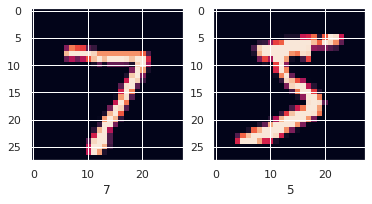

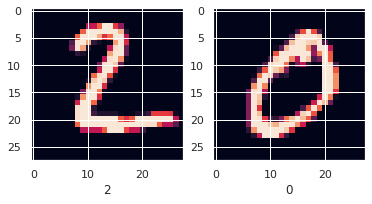

In [22]:
print(x_train.shape,x_train.size,x_train.ndim)
print(y_train.shape,y_train.size,y_train.ndim)
print(x_test.shape,x_test.size,x_test.ndim)
print(y_test.shape,y_test.size,y_test.ndim)
for i in range(0,2):
  plt.subplot(1,2,1)
  plt.imshow(x_test[i,:,:])
  plt.xlabel(y_test[i])
  plt.subplot(1,2,2)
  plt.imshow(x_train[i,:,:])
  plt.xlabel(y_train[i])
  plt.show()



### 对数据标签（y_train/y_test)进行one-hot编码
### 对图像数据（x_train/x_test）展开成二维数据

(60000, 10)
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


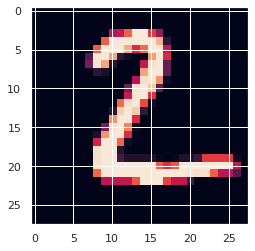

In [24]:
y_train_onehot=tf.keras.utils.to_categorical(y_train)
y_test_onehot=tf.keras.utils.to_categorical(y_test)
x_train_flatten = np.reshape(x_train, (60000, 28 * 28), order="C")
x_test_flatten = np.reshape(x_test, (10000, 28 * 28), order="C")
plt.imshow(x_test_flatten[1,:].reshape([28,28]))
print(y_train_onehot.shape)
print(y_train[100],y_train_onehot[100,:])

## Part3:模型建立


### 使用sklearn快速搭建KNN

In [4]:
model = KNeighborsClassifier()
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
start_time=time()
model.fit(x_train_flatten, y_train)
end_time=time()
print("amount time: {:.4f} s".format(end_time-start_time))

amount time: 15.8820 s


In [0]:
# 本函数用于可视化结果并展示分类准确性
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")


Sum Axis-1 as Classification accuracy: 0.9688
amount time: 983.3925 s


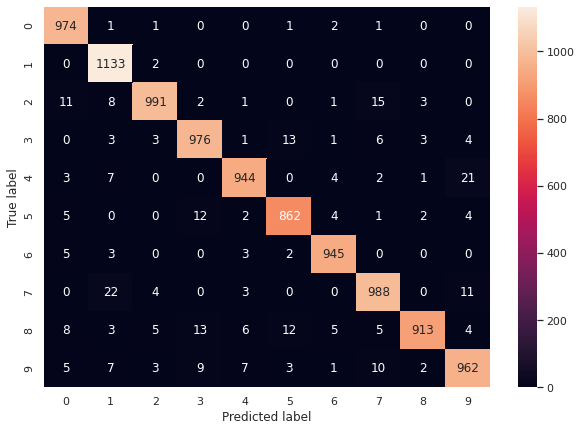

In [7]:
start_time=time()
yhat = model.predict(x_test_flatten)
draw_confusionmatrix(y_test,yhat)
end_time=time()
print("amount time: {:.4f} s".format(end_time-start_time))

### 自定义函数搭建简易K近邻算法（K=1）

Case No. 0 True_label: 7 Pridiction: 7 Index Number: 53843


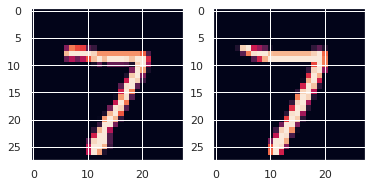

Case No. 1 True_label: 2 Pridiction: 2 Index Number: 28882


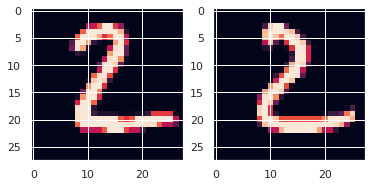

Case No. 2 True_label: 1 Pridiction: 1 Index Number: 58741


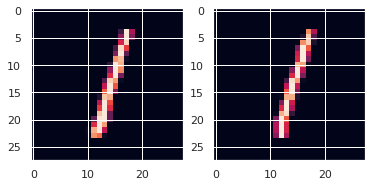

Accuracy for the first 1 Thousand cases is: 0.962
Accuracy for the first 2 Thousand cases is: 0.960
Accuracy for the first 3 Thousand cases is: 0.957
Accuracy for the first 4 Thousand cases is: 0.956
Accuracy for the first 5 Thousand cases is: 0.956
Accuracy for the first 6 Thousand cases is: 0.960
Accuracy for the first 7 Thousand cases is: 0.963
Accuracy for the first 8 Thousand cases is: 0.966
Accuracy for the first 9 Thousand cases is: 0.969
Accuracy for the first 10 Thousand cases is: 0.969
Sum Axis-1 as Classification accuracy: 0.9688
amount time: 1846.2798 s


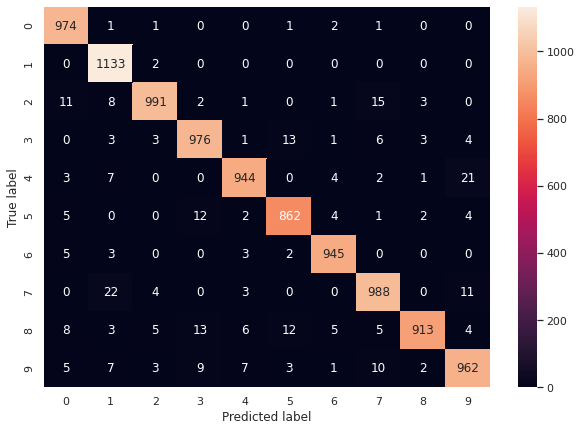

In [18]:
def knn(x_train, x_test,y_train,y_test):
    true_num = 0
    y_hat=np.zeros(10000)
    for i in range(10000):
        test_data = x_test[i]
        train_data = x_train
        min_index = np.argmin(np.sqrt(np.sum(np.square(test_data-train_data), axis=1)))
        predict = y_train[min_index]
        real_data = y_test[i]
        y_hat[i] = predict
        if predict == real_data:
          true_num += 1
          accuracy = true_num/(i+1) 
        if i<=2:
          print("Case No.",i,"True_label:",real_data,"Pridiction:",predict,"Index Number:",min_index)
          plt.subplot(1,2,1)
          plt.imshow(x_test[i,:].reshape([28,28]))
          plt.subplot(1,2,2)
          plt.imshow(x_train[min_index,:].reshape([28,28]))
          plt.show()
        if (i+1)%1000 == 0:
          print("Accuracy for the first %d Thousand cases is: %.3f"%((i+1)/1000, accuracy))  
    draw_confusionmatrix(y_test,yhat)

start_time=time()
knn(x_train_flatten,x_test_flatten,y_train,y_test)
end_time=time()
print("amount time: {:.4f} s".format(end_time-start_time))    

## 特征提取

### 对于线性分类器（第一次作业）
#### 使用CNN网络，对线性分类器进行补充

##### 基本模型

In [27]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
start_time=time()
model_0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_0.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model_0.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
end_time=time()
print("amount time: {:.4f} s".format(end_time-start_time))   

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9274
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1134 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0781 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0570 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0466 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

##### CNN卷积网络模型
通过特征降维，在两层卷积后得到84个特征维度，用于Dense分类

In [33]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model0 = tf.keras.Sequential()

model0.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Flatten())
model0.add(Dense(120, activation='relu'))
model0.add(Dense(84, activation='relu'))
model0.add(Dense(10, activation='softmax'))

model0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [34]:
x_train_c = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_c = x_test.reshape(x_test.shape[0], 28, 28, 1)

start_time=time()
model0.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model0.fit(x_train_c, y_train_onehot, batch_size=128, epochs=10, verbose=1, validation_data=(x_test_c, y_test_onehot))
score = model0.evaluate(x_test_c, y_test_onehot)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
end_time=time()
print("amount time: {:.4f} s".format(end_time-start_time))  

Epoch 1/10
469/469 [==============================] - 22s 47ms/step - loss: 0.3040 - accuracy: 0.9121 - val_loss: 0.0843 - val_accuracy: 0.9723
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.0550 - val_accuracy: 0.9826
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.0455 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0428 - val_accuracy: 0.9861
Epoch 5/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0361 - val_accuracy: 0.9886
Epoch 7/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0398 - val_accuracy:

##### 总结
通过CNN特征提取、降维网络，分类器性能提高了约1%(97.56%->98.97%），但相应的训练时间增长了约7倍。

### 提取图片的HOG特征

In [0]:
from skimage.feature import hog

list_hog_fd = [] 
for i in range(60000):
    fd = hog(x_train_flatten[i,:].reshape((28, 28)),
             orientations=9, 
             pixels_per_cell=(14, 14), 
             cells_per_block=(1, 1), 
             visualize=False)
    list_hog_fd.append(fd)
list_hog_fd1 = []     
for i in range(10000):
    fd = hog(x_test_flatten[i,:].reshape((28, 28)),
             orientations=9, 
             pixels_per_cell=(14, 14), 
             cells_per_block=(1, 1), 
             visualize=False)
    list_hog_fd1.append(fd)  

In [47]:
x_train_hog=np.array(list_hog_fd)
x_test_hog=np.array(list_hog_fd1)
print(x_train_hog.shape,x_test_hog.shape)

(60000, 36) (10000, 36)


In [0]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [53]:
start_time=time()
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_1.fit(x_train_hog, y_train, epochs=30)
test_loss, test_acc = model_1.evaluate(x_test_hog,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
end_time=time()
print("amount time: {:.4f} s".format(end_time-start_time))

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9148
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2553 - accuracy: 0.9155
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2548 - accuracy: 0.9154
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2537 - accuracy: 0.9148
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2524 - accuracy: 0.9161
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2523 - accuracy: 0.9165
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2511 - accuracy: 0.9165
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2504 - accuracy: 0.9169
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2501 - accuracy: 0.9171
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

#### 总结
通过提取图片的HOG特征，在如图的30 EPOCHES 中，在与线性分类器相同的网络中，依旧有迭代增加的趋势，但收敛较慢，HOG特征依旧有较大潜力可以挖掘。